Link to my GitHub repo: https://github.com/zehaoj/DD2360HT22

In [1]:
import matplotlib.pyplot as plt
import subprocess
import numpy as np

!nvcc --version
!nvidia-smi

!git clone https://github.com/zehaoj/lab3_cu_files.git
%cd lab3_cu_files

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Tue Dec 13 10:16:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

# Ex1 Your first CUDA program and GPU performance metrics

### Compile:

In [2]:
!nvcc ./lab3_ex1.cu -o lab3_ex1

### Run

In [3]:
!./lab3_ex1 131070

The input length is 131070
Host to Device Time: 0.000724
threads per block: 128 
blocks num: 1024 
CUDA Kernel: 0.000071
Device to Host Time: 0.000946
All good!


### Profile

In [4]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex1 131070

The input length is 131070
==PROF== Connected to process 180 (/content/lab3_cu_files/lab3_ex1)
Host to Device Time: 0.000758
threads per block: 128 
blocks num: 1024 
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
CUDA Kernel: 2.713575
Device to Host Time: 0.001081
All good!
==PROF== Disconnected from process 180
[180] lab3_ex1@127.0.0.1
  vecAdd(double*, double*, double*, int), 2022-Dec-13 10:16:19, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.91
    SM Frequency                                                             cycle/usecond                         575.64
    Elapsed Cycles                                                                   cycle                          6,489
    Memory [%]                           

## Questions

1. Explain how the program is compiled and run. 

  **Shown above.**

2. For a vector length of N:
  1. How many floating operations are being performed in your vector add kernel? 

    **N**

  2. How many global memory reads are being performed by your kernel? 
  
    **2N**

3. For a vector length of 1024:
    1. Explain how many CUDA threads and thread blocks you used. 

      **Threads per blocks: 128; Blocks: 8.**

    2. Profile your program with Nvidia Nsight. What Achieved Occupancy did you get?

      **12.13%**


4. Now increase the vector length to 131070:
  1. Did your program still work? If not, what changes did you make?

    **It works.**

  2. Explain how many CUDA threads and thread blocks you used.

    **Threads per blocks: 128; Blocks: 1024.**

  3. Profile your program with Nvidia Nsight. What Achieved Occupancy do you get now?

    **76.96%**

5. Further increase the vector length (try 6-10 different vector length), plot a stacked bar chart showing the breakdown of time including (1) data copy from host to device (2) the CUDA kernel (3) data copy from device to host.

In [5]:
vector_length_list = ["123456", "654321", "1234567", "7654321", "12345678", "87654321"]
host2device_list = []
device2host_list = []
cuda_list = []

for vectorLength in vector_length_list:
  result = subprocess.run(['./lab3_ex1', vectorLength], stdout=subprocess.PIPE)
  result = result.stdout.decode('utf-8').split("\n")
  host2device_list.append(float(result[1].split(":")[1]))
  device2host_list.append(float(result[5].split(":")[1]))
  cuda_list.append(float(result[4].split(":")[1]))

print(host2device_list)
print(cuda_list)
print(device2host_list)

host2device_list = np.array(host2device_list)
cuda_list = np.array(cuda_list)
device2host_list = np.array(device2host_list)

[0.000642, 0.0046, 0.017718, 0.028551, 0.049577, 0.296752]
[3.1e-05, 8e-05, 0.000132, 0.000714, 0.001141, 0.00799]
[0.000782, 0.005731, 0.022494, 0.04491, 0.070952, 0.445688]


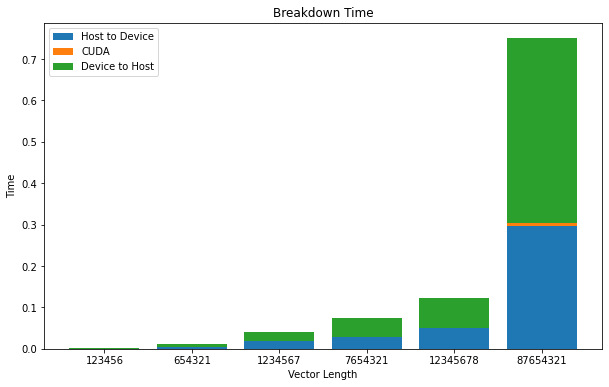

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(vector_length_list, host2device_list, label='Host to Device')
plt.bar(vector_length_list, cuda_list, bottom=host2device_list, label='CUDA')
plt.bar(vector_length_list, device2host_list, 
        bottom=cuda_list+host2device_list, label='Device to Host')
plt.title('Breakdown Time')
plt.xlabel('Vector Length')
plt.ylabel('Time')
plt.legend()
plt.show()

# Ex2 2D Dense Matrix Multiplication

### Compile

In [7]:
!nvcc ./lab3_ex2.cu -o lab3_ex2

### Run

In [8]:
!./lab3_ex2 511 1023 1023 4094

Input matrix dim (511 x 1023) (1023 x 4094) (511 x 4094)
Host to Device Time: 0.008243
threads per block x: 32 y: 32
blocks num x: 128, y: 16 
CUDA Kernel: 0.048076
Device to Host Time: 0.010457
All good!


### Profile

In [9]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex2 511 1023 1023 4094

Input matrix dim (511 x 1023) (1023 x 4094) (511 x 4094)
==PROF== Connected to process 264 (/content/lab3_cu_files/lab3_ex2)
Host to Device Time: 0.008191
threads per block x: 32 y: 32
blocks num x: 128, y: 16 
==PROF== Profiling "gemm" - 1: 0%....50%....100% - 8 passes
CUDA Kernel: 1.016107
Device to Host Time: 0.011281
All good!
==PROF== Disconnected from process 264
[264] lab3_ex2@127.0.0.1
  gemm(double*, double*, double*, int, int, int, int), 2022-Dec-13 10:17:39, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           5.00
    SM Frequency                                                             cycle/usecond                         584.94
    Elapsed Cycles                                                                   cycle                  

### Questions

1. Name three applications domains of matrix multiplication.

  **Machine learning, scientific computing, computer graphics.**

2. How many floating operations are being performed in your matrix multiply kernel? 

  **2 * numARows * numBColumns * numAColumns**

3. How many global memory reads are being performed by your kernel?  

  **3 * numARows * numBColumns * numAColumns**

4. For a matrix A of (128x128) and B of (128x128):
  1. Explain how many CUDA threads and thread blocks you used. 
  
    **32 thread per block X, 32 thread per block Y, 4 blocks X, 4 blocks Y**
  2. Profile your program with Nvidia Nsight. What Achieved Occupancy did you get? 

    **96.28%**

5. For a matrix A of (511x1023) and B of (1023x4094):
  1. Did your program still work? If not, what changes did you make?

    **It works.**
  2. Explain how many CUDA threads and thread blocks you used.

    **32 thread per block X, 32 thread per block Y, 128 blocks X, 16 blocks Y**

  3. Profile your program with Nvidia Nsight. What Achieved Occupancy do you get now?

    **98.57%**

6. Further increase the size of matrix A and B, plot a stacked bar chart showing the breakdown of time including (1) data copy from host to device (2) the CUDA kernel (3) data copy from device to host. For this, you will need to add simple CPU timers to your code regions. Explain what you observe.

In [10]:
dimension_list = ["200", "300", "400", "500", "600"]
host2device_list = []
device2host_list = []
cuda_list = []
whole_dimension_list = []

for dimension1 in dimension_list:
  # for dimension2 in dimension_list:
    # for dimension3 in dimension_list:
  dimension2 = str(int(dimension1) * 2)
  dimension3 = dimension2
  whole_dimension_list.append("(" + dimension1 + ", " + 
                              dimension2 + ") * \n(" + dimension2
                              + ", " + dimension3 + ")")
  result = subprocess.run(['./lab3_ex2', dimension1, dimension2, 
                            dimension2, dimension3], stdout=subprocess.PIPE)
  result = result.stdout.decode('utf-8').split("\n")
  host2device_list.append(float(result[1].split(":")[1]))
  device2host_list.append(float(result[5].split(":")[1]))
  cuda_list.append(float(result[4].split(":")[1]))

print(host2device_list)
print(cuda_list)
print(device2host_list)
print(whole_dimension_list)

host2device_list = np.array(host2device_list)
cuda_list = np.array(cuda_list)
device2host_list = np.array(device2host_list)

[0.000553, 0.001063, 0.001999, 0.002736, 0.003911]
[0.000846, 0.002756, 0.005846, 0.011494, 0.020136]
[0.000525, 0.001064, 0.001761, 0.002601, 0.004003]
['(200, 400) * \n(400, 400)', '(300, 600) * \n(600, 600)', '(400, 800) * \n(800, 800)', '(500, 1000) * \n(1000, 1000)', '(600, 1200) * \n(1200, 1200)']


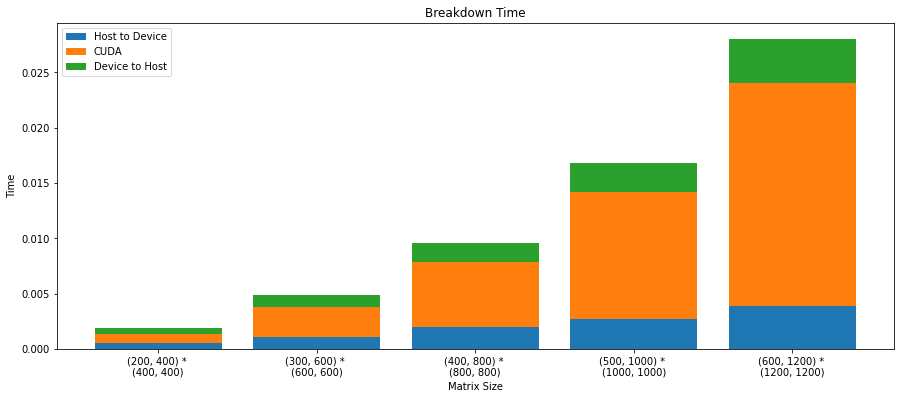

In [11]:
plt.figure(figsize=(15, 6))
plt.bar(whole_dimension_list, host2device_list, label='Host to Device')
plt.bar(whole_dimension_list, cuda_list, bottom=host2device_list, label='CUDA')
plt.bar(whole_dimension_list, device2host_list, 
        bottom=cuda_list+host2device_list, label='Device to Host')
plt.title('Breakdown Time')
plt.xlabel('Matrix Size')
plt.ylabel('Time')
plt.legend()
plt.show()

**What I observed: the CUDA part takes up most of the time since the matrix size is increasing and the calculation is increase by multiplication over ARows, BColumns and AColumns.**

7. Now, change DataType from double to float, re-plot the a stacked bar chart showing the time breakdown. Explain what you observe. 

In [12]:
!nvcc ./lab3_ex2_float.cu -o lab3_ex2_float

In [13]:
dimension_list = ["200", "300", "400", "500", "600"]
host2device_list = []
device2host_list = []
cuda_list = []
whole_dimension_list = []

for dimension1 in dimension_list:
  dimension2 = str(int(dimension1) * 2)
  dimension3 = dimension2
  whole_dimension_list.append("(" + dimension1 + ", " + 
                              dimension2 + ") * \n(" + dimension2
                              + ", " + dimension3 + ")")
  result = subprocess.run(['./lab3_ex2_float', dimension1, dimension2, 
                            dimension2, dimension3], stdout=subprocess.PIPE)
  result = result.stdout.decode('utf-8').split("\n")
  host2device_list.append(float(result[1].split(":")[1]))
  device2host_list.append(float(result[5].split(":")[1]))
  cuda_list.append(float(result[4].split(":")[1]))

print(host2device_list)
print(cuda_list)
print(device2host_list)
print(whole_dimension_list)

host2device_list = np.array(host2device_list)
cuda_list = np.array(cuda_list)
device2host_list = np.array(device2host_list)

[0.000318, 0.00061, 0.000976, 0.00153, 0.00199]
[0.000281, 0.000765, 0.001592, 0.003233, 0.005683]
[0.000265, 0.000564, 0.000993, 0.00148, 0.00204]
['(200, 400) * \n(400, 400)', '(300, 600) * \n(600, 600)', '(400, 800) * \n(800, 800)', '(500, 1000) * \n(1000, 1000)', '(600, 1200) * \n(1200, 1200)']


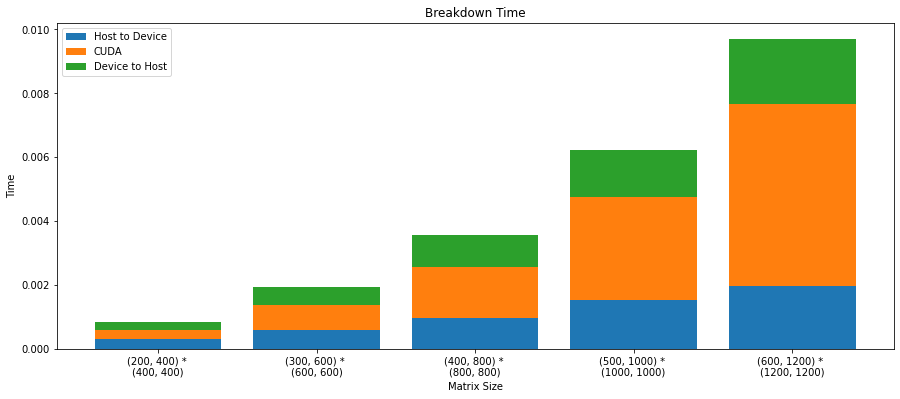

In [14]:
plt.figure(figsize=(15, 6))
plt.bar(whole_dimension_list, host2device_list, label='Host to Device')
plt.bar(whole_dimension_list, cuda_list, bottom=host2device_list, label='CUDA')
plt.bar(whole_dimension_list, device2host_list, 
        bottom=cuda_list+host2device_list, label='Device to Host')
plt.title('Breakdown Time')
plt.xlabel('Matrix Size')
plt.ylabel('Time')
plt.legend()
plt.show()

**What I observed: Using `float` is much faster than double, because float only has half the size of double.**

# Ex3 Histogram and Atomics

### Questions

1. Describe all optimizations you tried regardless of whether you committed to them or abandoned them and whether they improved or hurt performance. 

  **I only implemented writing to global memory using atomicAdd(). It will not be the optimal solution when facing large number inputs but much easier to write.**

  **I didn't implement writing to shared memory method but I think it will perform better when the input is large.**

2. Which optimizations you chose in the end and why? 

  **I chose global memory optimization because it is easier to implement and also since the input elements won't be too large in this lab, the performance difference will be not that big.**

3. How many global memory reads are being performed by your kernel? Explain 

  **For the histogram_kernel, 2 * numElements are performed because add function is called; for the convert_kernel, numBins are performed because it needs to iterate through all bins.**

4. How many atomic operations are being performed by your kernel? Explain

  **For the histogram_kernel, numElements; for the convert_kernel, none.**

5. How much shared memory is used in your code? Explain

  **None**

6. How would the value distribution of the input array affect the contention among threads? For instance, what contentions would you expect if every element in the array has the same value? 

  **If every element in the array has the same value (e.g. 127) then that's the max contention.**

7. Plot a histogram generated by your code and specify your input length, thread block and grid.

  Here, I choose inputLength=102400, with 32 threads per block and 3305 blocks.

In [15]:
!nvcc ./lab3_ex3.cu -o lab3_ex3

In [16]:
result = subprocess.run(['./lab3_ex3', '102400'], stdout=subprocess.PIPE)
result = result.stdout.decode('utf-8')
histogram = result.split('\n')[-1].split(' ')

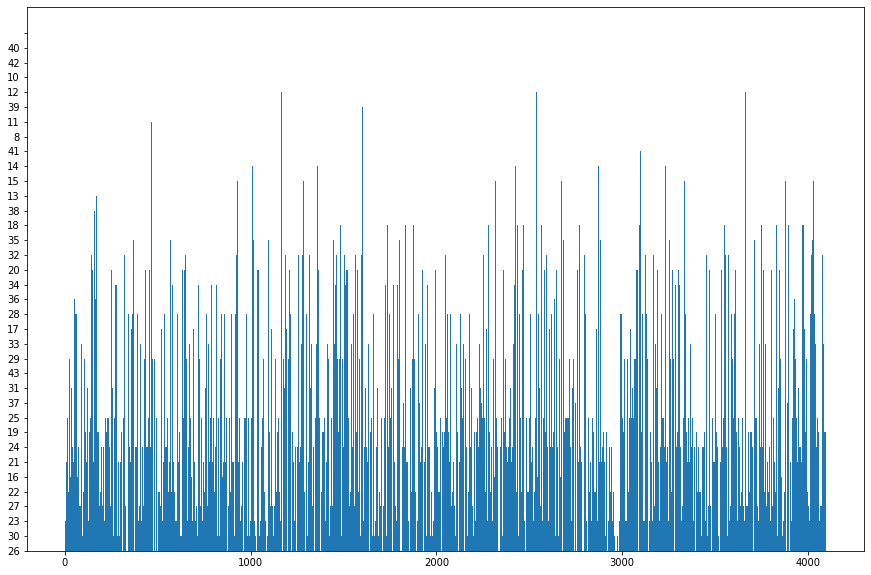

In [17]:
plt.figure(figsize=(15, 10))
bins = list(range(1,len(histogram)+1))
plt.bar(bins, histogram, width=1.0)
plt.show()

8. For a input array of 1024 elements, profile with Nvidia Nsight and report Shared Memory Configuration Size and Achieved Occupancy. Did Nvsight report any potential performance issues?

  Yes, it gave the warning 
  
  *WRN   This kernel grid is too small to fill the available resources on this device, resulting in only 0.1 full waves across all SMs. Look at Launch Statistics for more details.*

In [18]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex3 1024

The input length is 1024
==PROF== Connected to process 397 (/content/lab3_cu_files/lab3_ex3)
==PROF== Profiling "histogram_kernel" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "convert_kernel" - 2: 0%....50%....100% - 8 passes
All good!
0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 1 0 2 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 2 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 2 0 0 2 0 0 0 1 0 0 0 1 1 0 2 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0

# Ex4 A Particle Simulation Application

### Questions

1. Describe the environment you used, what changes you made to the Makefile, and how you ran the simulation.

  **Just like last lab, in order to run correctly on colab gpus, we need to change `sm_30` to `sm_75`. Then just reguler `make all` is enough.**

2. Describe your design of the GPU implementation of mover_PC() briefly. 
  
  I mostly followed the steps in earlier exercises, including 

  • Allocate device memory

  • Copy from host memory to device memory

  • Initialize thread block and kernel grid dimensions

  • Invoke CUDA kernel

  • Copy results from GPU to CPU

  • Free device memory

  And as for the CUDA kernel, I just copied the `move_PC()` function and move it out to a function called `commonUsage` to avoid duplicate codes. 

In [19]:
%cd ..
!rm -rf sputniPIC-DD2360/
!git clone https://github.com/zehaoj/sputniPIC-DD2360.git --depth=1

/content
Cloning into 'sputniPIC-DD2360'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 2), reused 34 (delta 2), pack-reused 0
Unpacking objects: 100% (42/42), done.


In [20]:
%cd sputniPIC-DD2360
!make all

/content/sputniPIC-DD2360
mkdir -p ./bin
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/TransArraySpace3D.cpp -c -o src/TransArraySpace3D.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/EMfield.cpp -c -o src/EMfield.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/Basic.cpp -c -o src/Basic.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/Particles_aux.cpp -c -o src/Particles_aux.o
src/Particles_aux.cpp: In function ‘void particle_aux_allocate(particles*, particles_aux*, int)’:
src/Particles_aux.cpp:14:10: warning: unused variable ‘npmax’ [-Wunused-variable]
     long npmax = part->npmax;
          ^~~~~
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/BC.cpp -c -o src/BC.o
nvcc -I./include -arch=sm_75 -std=c++11 -O3 -g -Xcompiler -Wall --compiler-bindir=g++ src/Particles.cu -c -o src/Particles.o
src/Particles.cu: In function

In [21]:
!./bin/sputniPIC.out inputfiles/GEM_2D.inp


-------------------------
sputniPIC Sim. Parameters
-------------------------
Number of species    = 4
Number of particles of species 0 = 4096000	 (MAX = 4096000)  QOM = -64
Number of particles of species 1 = 4096000	 (MAX = 4096000)  QOM = 1
Number of particles of species 2 = 4096000	 (MAX = 4096000)  QOM = -64
Number of particles of species 3 = 4096000	 (MAX = 4096000)  QOM = 1
x-Length                 = 40
y-Length                 = 20
z-Length                 = 1
Number of cells (x)      = 256
Number of cells (y)      = 128
Number of cells (z)      = 1
Time step                = 0.25
Number of cycles         = 10
Results saved in: data
*************************************************
**  Initialize GEM Challenge with Pertubation  **
*************************************************
** B0x = 0.0195
** B0y = 0
** B0z = 0
** Delta (current sheet thickness) = 0.5
** rho species 0 = 1 CURRENT SHEET 
** rho species 1 = 1 CURRENT SHEET 
** rho species 2 = 0.02 BACKGROUND 
** rho species

3. Compare the output of both CPU and GPU implementation to guarantee that your GPU implementations produce correct answers.

  True.

4. Compare the execution time of your GPU implementation with its CPU version.

  Up: GPU; Down: CPU

  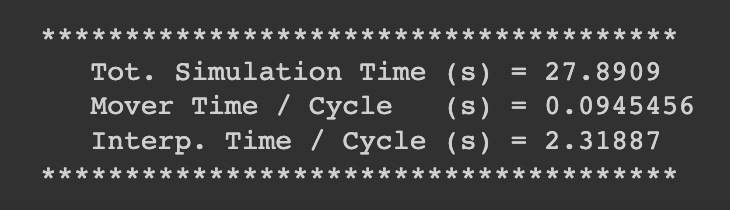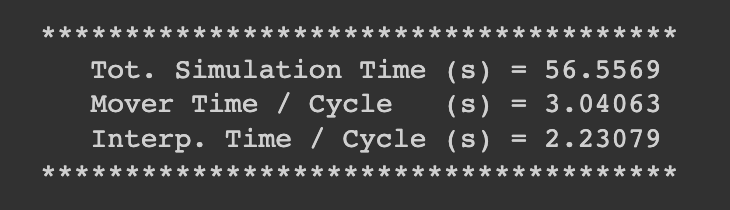
